## Data Visualization

We will show the cooccurance data in a visualization using seaborn package

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()

### Comorbidities

In [17]:
data_comorb = pd.read_csv("two_comorbidities.csv")

In [18]:
data_comorb.head(10)

,Unnamed: 0,Comorbidity 1:,Comorbidity 2:,Overlap
0,0,HIV,HIV,1592
1,1,HIV,Acquired Immunodeficiency Syndrome,42
2,2,HIV,Neoplasms,47
3,3,HIV,Liver Diseases,26
4,4,HIV,Asthma,129
5,5,HIV,Lung Diseases,35
6,6,HIV,"Pulmonary Disease, Chronic Obstructive",71
7,7,HIV,Nervous System Diseases,3
8,8,HIV,Cerebrovascular Disorders,2
9,9,HIV,Kidney Diseases,8


In [19]:
C1 = data_comorb['Comorbidity 1:']
C2 = data_comorb['Comorbidity 2:']
V = data_comorb['Overlap']

In [20]:
U1 = []
for item in C1:
    if item not in U1:
        U1.append(item)

In [21]:
Data = []
for e1 in U1:
    data = {"name":e1}
    for ex,e2,v in zip(C1,C2,V):
        if ex==e1:
            data.update({e2:v})
    Data.append(data)

In [22]:
DF_comorb = pd.DataFrame(Data)

In [23]:
DF_comorb = DF_comorb.set_index("name")

In [24]:
DF_comorb = DF_comorb.fillna(0)

In [25]:
DF_comorb.shape

(26, 26)

In [27]:
NDF = pd.DataFrame()
for c in DF_comorb.index:
    NDF[c] = DF_comorb[c]

In [28]:
NDF.head(1)

,HIV,Acquired Immunodeficiency Syndrome,Neoplasms,Liver Diseases,Asthma,Lung Diseases,"Pulmonary Disease, Chronic Obstructive",Nervous System Diseases,Cerebrovascular Disorders,Kidney Diseases,...,Metabolic Diseases,"Diabetes Mellitus, Type 1","Diabetes Mellitus, Type 2",Obesity,Immunosuppressive Agents,Bone Marrow Transplantation,Transplantation,Smoking,Pregnancy,Pediatrics
name,,,,,,,,,,,,,,,,,,,,,
HIV,1592,42,47,26,129,35,71,3,2,8,...,18,15,22,107,28,38,182,98,154,47


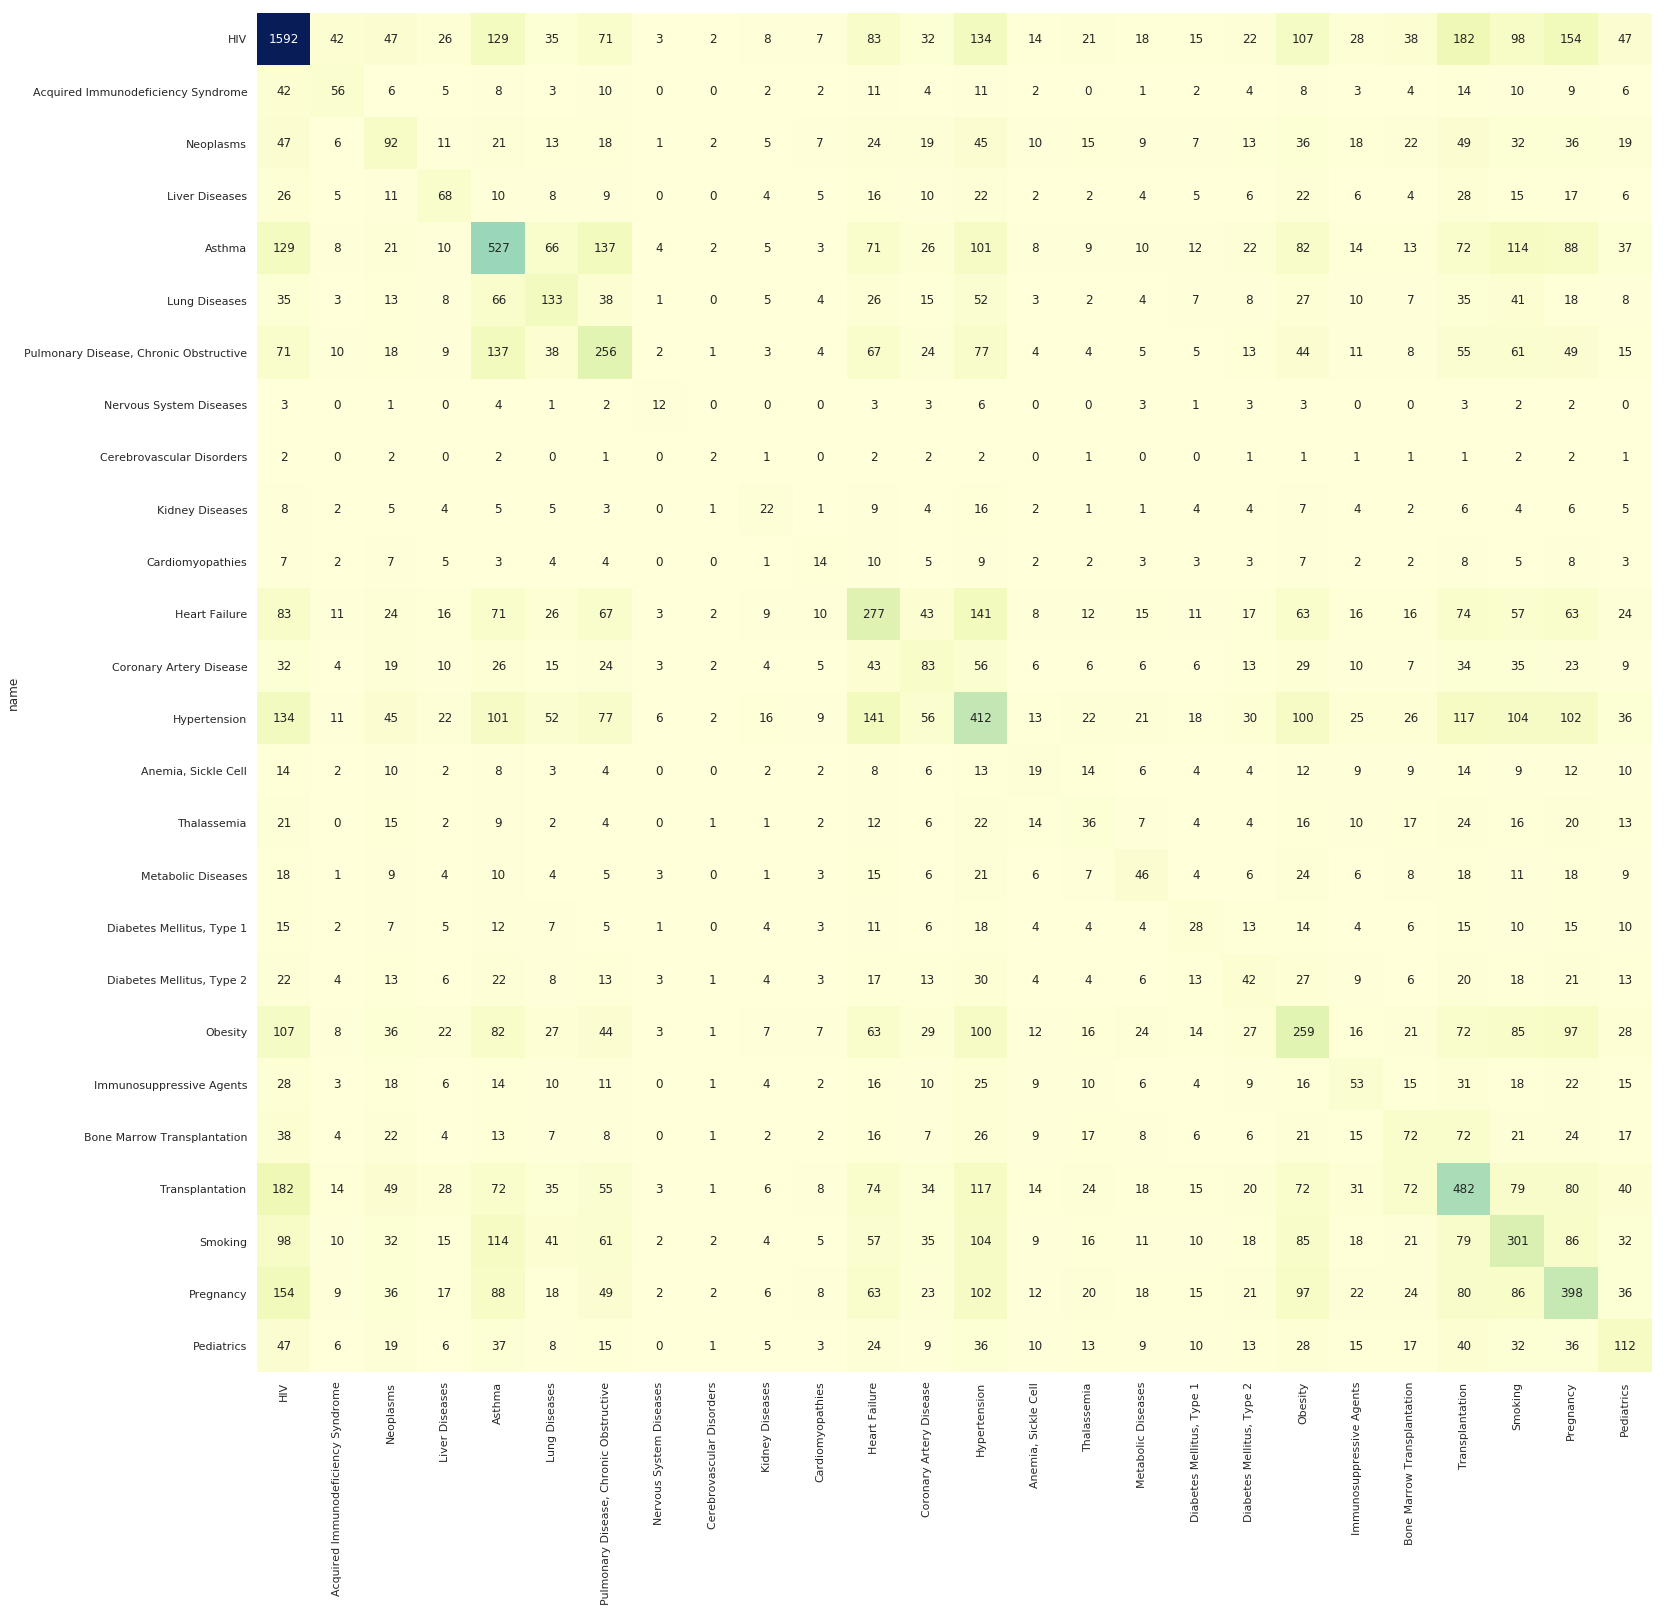

In [29]:
plt.figure(figsize = [25,25])
sns.heatmap(NDF, cmap="YlGnBu", annot = True, fmt='.0f',cbar=False)
plt.savefig("Comorb.pdf")